<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML16_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris

import tensorflow as tf
from tensorflow import keras
from keras.datasets.fashion_mnist import load_data


# Iris Data

In [4]:
iris_data, iris_target = load_iris(return_X_y=True)

In [5]:
iris_data.shape,iris_target.shape

((150, 4), (150,))

In [6]:
np.unique(iris_target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

샘플의 변수는 2개로 축소, 타겟(0:setosa, 1:non-setosa)

In [7]:
X = iris_data[:,-2:]
y = (iris_target !=0).astype(np.int32)

In [8]:
X.shape,y.shape

((150, 2), (150,))

In [9]:
np.unique(y,return_counts=True)

(array([0, 1], dtype=int32), array([ 50, 100]))

## single-layer 신경망

In [10]:
# 신경망 모델 생성 -  설계
model = keras.Sequential(layers =[keras.layers.Dense(units = 1, activation='sigmoid',input_shape=(2,))],
                         name = 'iris_single_layer')

* `keras.Sequential` 클래스: 신경망 모델(input-hidden-output layer)
* `keras.layers.Dense` 클래스: Dense 층(한개 이상의 unit(neuron)으로 이루어진 층)
    * `units` 파라미터: dense layer가 갖는 유닛의 개수
    * `activation` 파라미터: 활성화 함수 이름
    * `input_shape` 파라미터: 한개의 유닛으로 입력되는 input data의 shape(튜플)
        * 신경망 모델이 찾아야 하는 파라미터(weights, bias)의 개수를 결정하기 위해서 필요.
        

In [11]:
# 생성된 신경망 모델 요약: layers, parameters
model.summary()

Model: "iris_single_layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 신경망 모델 컴파일: optimizer, loss, metrics 등을 설정
# optimizer : weight와 bias를 찾기 위한 훈련 방법
# loss: 비용 함수(이름)
# metrics: 성능 평가 지표(정확도, R2 score, RMSE 등)
model.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics='accuracy')

In [13]:
# 신경망 모델 훈련 - loss를 줄여주는, metric를 크게 만들어 주는 weight와 bias를 찾는 과정.
model.fit(X,y, epochs=10)

Epoch 1/10
5/5 [==============================] - 3s 3ms/step - loss: 3.9754 - accuracy: 0.3459
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 3.4080 - accuracy: 0.3390
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 2.7855 - accuracy: 0.3598
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 2.4598 - accuracy: 0.3060
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 1.8804 - accuracy: 0.3086
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 1.4152 - accuracy: 0.3359
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 1.0513 - accuracy: 0.3511
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.8391 - accuracy: 0.3101
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6316
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7434


In [14]:
# 신경망 모델의 훈련이 끝난 후 파라미터들(weight, bias)
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.21463871],
        [ 0.8614443 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.2045454], dtype=float32)>]

In [15]:
# 훈련된 모델 평가
model.evaluate(X,y)

5/5 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7000


[0.5460094809532166, 0.699999988079071]

In [16]:
# 훈련된 모델을 사용해서 예측
model.predict(X[[0,50,100]])
#> 이진 분류(binary class classification)에서 predict() 메서드는 양성 샘플(class=1)dl 될 확률을 리턴.

array([[0.51907575],
       [0.59911174],
       [0.7446585 ]], dtype=float32)

In [17]:
model.predict_proba(X[[0,50,100]]) #>deprecated

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0.51907575],
       [0.59911174],
       [0.7446585 ]], dtype=float32)

In [18]:
model.predict_classes(X[[0,50,100]])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1]], dtype=int32)

## DNN(Deep Neural Network)

Hidden layer(은닉층)이 한개 이상인 신경망 모델

In [19]:
# 모델 생성
model2 = keras.Sequential(name='iris_2_layers')

In [20]:
# Sequential 객체에 hidden layer를 추가
model2.add(keras.layers.Dense(units=10, activation='sigmoid',input_shape=(2,)))
# hidden layer 뒤에 output layer를 추가
model2.add(keras.layers.Dense(units=1, activation='sigmoid'))
# 첫번째 layer에서만 input_shape을 결정해 주면,
# 두번째부터 연결되는 layer에서는 input_shape이 자동으로 계산되서 결정됨

In [21]:
# 생성된 모델 요약
model2.summary()

Model: "iris_2_layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(optimizer='sgd', loss = 'binary_crossentropy', metrics='accuracy')

In [29]:
model2.fit(X,y, epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5201 - accuracy: 0.7001
Epoch 2/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.6866
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.6827
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.6740
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.6806
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.6437
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.6975
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.6593
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5279 - accuracy: 0.6771
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.6545


In [30]:
model2.weights
#> tf.Variance 클래스의 객체들을 저장하고 있는 리스트

[<tf.Variable 'dense_1/kernel:0' shape=(2, 10) dtype=float32, numpy=
 array([[ 0.16254723, -0.6563843 , -0.5798243 ,  0.26564053, -0.12722048,
          0.6322237 , -0.43328544, -0.6996785 , -0.15565582,  0.07913835],
        [ 0.52953655,  0.24665204, -0.41011965,  0.28540343,  0.7001068 ,
          0.46216333,  0.2112004 , -0.12552543,  0.27843773, -0.6846568 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.0033901 ,  0.00457928,  0.00829502, -0.00813088, -0.00261947,
        -0.01318599,  0.00246748,  0.00223576,  0.00217087, -0.00244243],
       dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[-0.22939166],
        [-0.28096893],
        [-0.4551799 ],
        [ 0.5616295 ],
        [ 0.38625067],
        [ 0.7106491 ],
        [-0.19152331],
        [-0.13679905],
        [-0.39371046],
        [ 0.2710672 ]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32

In [31]:
model2.weights[0] #> 입력 데이터들이 첫번째 layer로 입력될 때 곱해지게 될 Weight 행렬

<tf.Variable 'dense_1/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.16254723, -0.6563843 , -0.5798243 ,  0.26564053, -0.12722048,
         0.6322237 , -0.43328544, -0.6996785 , -0.15565582,  0.07913835],
       [ 0.52953655,  0.24665204, -0.41011965,  0.28540343,  0.7001068 ,
         0.46216333,  0.2112004 , -0.12552543,  0.27843773, -0.6846568 ]],
      dtype=float32)>

In [32]:
model2.weights[1] #> 입력 데이터들이 첫번째 layer로 입력될 때 곱해지게 될 bias(tensor)

<tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.0033901 ,  0.00457928,  0.00829502, -0.00813088, -0.00261947,
       -0.01318599,  0.00246748,  0.00223576,  0.00217087, -0.00244243],
      dtype=float32)>

In [33]:
# 평가
model2.evaluate(X,y)

5/5 [==============================] - 0s 4ms/step - loss: 0.5319 - accuracy: 0.6667


[0.5318964123725891, 0.6666666865348816]

In [34]:
# 예측
model.predict(X[[0,1,50,100,101]])

array([[0.51907575],
       [0.51907575],
       [0.59911174],
       [0.7446585 ],
       [0.6784444 ]], dtype=float32)

## iris 다중 클래스 분류_단일층

In [47]:
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [48]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
# 신경망 생성
model = keras.Sequential()

In [50]:
# 출력층 추가: 다중 클래스 분류의 경우 활성화 함수는 softmax를 사용
model.add(keras.layers.Dense(units=3, activation='softmax',input_shape=(4,)))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [52]:
#모델 컴파일
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [55]:
#모델 훈련
model.fit(iris_data,iris_target, epochs=100)
""" multimonial(다중 클래스) 분류이고, 타켓이 ont-hot encoding이 되어 있지 않은 경우,
손실함수는 sparse_categorical_crossentropy를 사용.
ont-hot encording되어 있는 경우에는, categorical_crossentropy를 사용."""

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.9200
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.9267
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.9133
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.9133
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9267
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.9267
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.9467
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.9200
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.9267
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3888 - accuracy: 0.9267
Epoch 11/100
5/5 [===========

' multimonial(다중 클래스) 분류이고, 타켓이 ont-hot encoding이 되어 있지 않은 경우,\n손실함수는 sparse_categorical_crossentropy를 사용.\nont-hot encording되어 있는 경우에는, categorical_crossentropy를 사용.'

# fashion

In [63]:
# keras.datasets.fashion_mnist.load_data()

(x_tr,y_tr),(x_ts,y_ts) = load_data()

In [65]:
x_tr.shape,y_tr.shape
#> data shape: (n_samples, height, width)
#> target shape : (n_samples,)

((60000, 28, 28), (60000,))

In [66]:
x_ts.shape,y_ts.shape

((10000, 28, 28), (10000,))

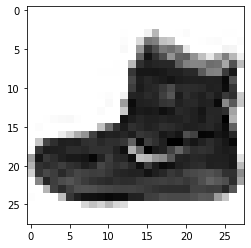

In [70]:
plt.imshow(x_tr[0],cmap='binary')
plt.show()

In [71]:
y_tr[0]

9

In [72]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [73]:
np.unique(y_ts, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [87]:
len(x_tr[:30])

30

In [ ]:
""" 스스로 꼭 다시 해보기"""

# 0~10

len(x_tr[:30])


for i, pic in enumerate(x_tr[:30]):
    fig, ax = plt.subplots(nrows=(i//10)+1, ncols=10)

    #print((i//10)+1,i%10)

plt.show()

In [98]:
# 이미지들의 배열을 전달 받아서,
# row의 개수는 이미지의 개수에 따라서 조절되도록
# 이미지를 출력

def plot_fashion_items(img_arr, ncols = 10):
    n = len(img_arr)
    nrows = int(np.ceil(n/ncols))
    fig, ax = plt.subplots(nrows,ncols, figsize=(ncols,nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx =  i * ncols + j
            if nrows == 1: # row의 갯수가 1이면
                if idx < n :
                    ax[idx].imshow(img_arr[idx], cmap='binary')
                ax[idx].axis('off')
            else:
                if idx < n:
                    ax[i,j].imshow(img_arr[idx], cmap='binary')
                ax[i,j].axis('off')

In [94]:
#<모범해설>
# 이미지들의 배열을 argument로 전달받아서, 
# row의 개수는 이미지의 개수에 따라서 계산해서,
# 이미지를 출력
def plot_fashion_items(img_arr, ncols=10):
    n = len(img_arr)
    nrows = int(np.ceil(n / ncols))
    fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if nrows == 1:  # row의 개수가 1이면 Subplot ax는 1차원 배열
                if idx < n:  # 이미지의 인덱스는 이미지의 개수보다 클 수 없음.
                    ax[idx].imshow(img_arr[idx], cmap=plt.cm.binary)
                ax[idx].axis('off')
            else:  # row의 개수가 2 이상이면 Subplot ax는 2차원 배열
                if idx < n:
                    ax[i, j].imshow(img_arr[idx], cmap=plt.cm.binary)
                ax[i, j].axis('off')

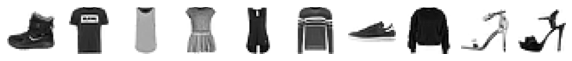

In [99]:
plot_fashion_items(x_tr[:10])

In [102]:
# 이미지 배열은 0~255 숫자로 이루어져 있음. -> 0 ~ 1 사이이 범위로 스케일링
x_tr[0].shape # 28 x 28
x_tr_s = x_tr/255
x_ts_s = x_ts/255

In [ ]:
x_tr_s[0]

## single-layer NN

In [119]:
# 모델생성
model = keras.Sequential()

In [120]:
# Flatten layer 추가 :(28,28) 모양의 2차원 배열을 (28x28,) 모양의 1차원 배열로 변환
model.add(keras.layers.Flatten(input_shape=(28,28)))
# 출력층(output layer) 추가
model.add(keras.layers.Dense(units=10, activation='softmax')) #input_shape=(28*28)
#> Dense: unit=layer의 뉴런 갯수=layer의 출력 갯수
#> Dense: activation=활성함수(2진분류: sigmoid, 다중클래스분류: softmax)
#> Dense: inupt_shape=(784,)
#> 첫번째 layer에서만 input_shape을 결정해 주면,
#> 두번째부터 연결되는 layer에서는 input_shape이 자동으로 계산되서 결정됨
#> 여기서는 Flatten layer를 추가 해서 거기에서 결정되어 자동으로 가져옴
model.compile(optimizer='sgd', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
# 신경망 모델 컴파일: optimizer, loss, metrics 등을 설정
# optimizer : weight와 bias를 찾기 위한 훈련 방법
# loss: 비용 함수(이름)
# metrics: 성능 평가 지표(정확도, R2 score, RMSE 등)
#> multimonial(다중 클래스) 분류이고, 타켓이 ont-hot encoding이 되어 있지 않은 경우,
#> 손실함수는 sparse_categorical_crossentropy를 사용.
#> ont-hot encording되어 있는 경우에는, categorical_crossentropy를 사용.

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [116]:
x_tr_s.shape,y_tr.shape

((60000, 28, 28), (60000,))

In [124]:
model.fit(x_tr_s,y_tr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4861 - accuracy: 0.8372
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4761 - accuracy: 0.8395
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4685 - accuracy: 0.8417
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4621 - accuracy: 0.8447
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4566 - accuracy: 0.8457
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4518 - accuracy: 0.8469
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4476 - accuracy: 0.8483
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4442 - accuracy: 0.8488
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4408 - accuracy: 0.8503
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.438

In [125]:
# 모델 평가
model.evaluate(x_ts_s,y_ts)

313/313 [==============================] - 1s 2ms/step - loss: 0.4720 - accuracy: 0.8369


[0.47202518582344055, 0.836899995803833]

## DNN

* flatten layer: 2차원 -> 1차원 배열
* hidden layer: 100개 unit
    * hidden layer에서는 활성화 함수로 sigmoid를 사용
* output layer
    * 활성화 함수:
* 최적화 알고리즘은 기본값인 'rmsprop'를 사용

In [126]:
model = keras.Sequential() # 모델생성
model.add(keras.layers.Flatten(input_shape=(28,28))) # flatten layer
model.add(keras.layers.Dense(units=100, activation='sigmoid')) # hidden layer1
model.add(keras.layers.Dense(units=10, activation='softmax')) # output layer

In [128]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy', metrics='accuracy') #최적화

In [130]:
model.fit(x_tr_s,y_tr,epochs=10) # 훈련

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7173 - accuracy: 0.7660
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4045 - accuracy: 0.8535
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3641 - accuracy: 0.8692
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.8771
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8823
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8864
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3076 - accuracy: 0.8877
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2888 - accuracy: 0.8967
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.8935
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.274

In [131]:
model.evaluate(x_ts_s,y_ts) #평가

313/313 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8769


[0.35272374749183655, 0.8769000172615051]

## DNN2

In [145]:
def create_model(image_size=(28,28),layer=None):
    
    model = keras.Sequential() # 모델생성
    model.add(keras.layers.Flatten(input_shape=(image_size)))
    model.add(keras.layers.Dense(units=100,activation='relu'))
    if layer : #추가 하려는 layer가 argument로 전달 됐을 때
        model.add(layer)
    model.add(keras.layers.Dense(units=10,activation='softmax'))

    return model

In [148]:
# create model 함수를 사용해서 신경망 모델 생성, 컴파일 훈련 평가
a = create_model() #모델 생성
a.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [149]:
a.compile(optimizer='rmsprop', loss = 'sparse_categorical_crossentropy', metrics='accuracy') # 컴파일

In [151]:
a.fit(x_tr_s,y_tr, epochs=10) # 훈련

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3766 - accuracy: 0.8652
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3454 - accuracy: 0.8773
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3288 - accuracy: 0.8832
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3160 - accuracy: 0.8881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3089 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2985 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2874 - accuracy: 0.9010
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2808 - accuracy: 0.9047
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.273

In [152]:
a.evaluate(x_ts_s,y_ts)

313/313 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8757


[0.41752323508262634, 0.8756999969482422]

In [155]:
# 위와 동일 모델을 새로 생성하고, optimizer='adam' 사용해서 훈련 평가
b = create_model()
b.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [157]:
b.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy') # 컴파일

In [158]:
b.fit(x_tr_s,y_tr,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6246 - accuracy: 0.7822
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3890 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3219 - accuracy: 0.8835
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2965 - accuracy: 0.8887
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2861 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2623 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2489 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [159]:
b.evaluate(x_ts_s,y_ts)

313/313 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8708


[0.36204788088798523, 0.8708000183105469]